In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading and reading in required datasets
path = 'https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv'
df = pd.read_csv(path)
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [3]:
# Converting dtype of the timestamp to datetime and setting as index
df['FullDate'] = pd.to_datetime(df['FullDate'])
df.set_index('FullDate', inplace=True)
df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


Text(0, 0.5, 'ElecPrice')

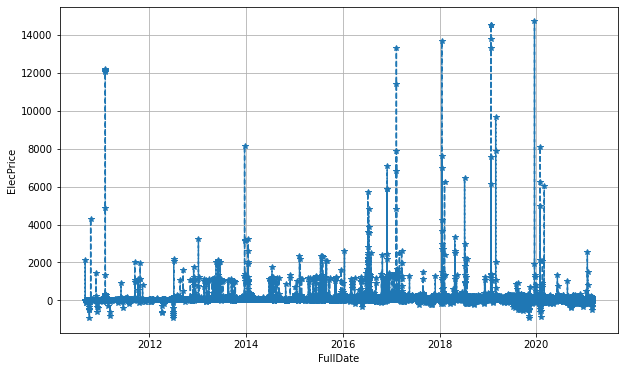

In [4]:
# Visuals of the relationship between timestamp and the target before downsampling
plt.figure(figsize=( 10 , 6 ))
plt.plot(df.index, df.ElecPrice, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'FullDate' )
plt.ylabel( 'ElecPrice' )

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92016 entries, 2010-09-01 00:00:00 to 2021-02-28 23:00:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmax       92016 non-null  float64
 1   SysLoad    92016 non-null  float64
 2   GasPrice   92016 non-null  float64
 3   ElecPrice  92016 non-null  float64
dtypes: float64(4)
memory usage: 3.5 MB


In [6]:
# Checking the shape of the dataframe before downsampling
df.shape

(92016, 4)

In [7]:
# Downsampling data sample to daily from hourly
df_day = df.resample('D').sum()
df_day.head()


,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [8]:
df_day1 = df_day.drop(columns=['Tmax', 'SysLoad', 'GasPrice'])
df_day1.head()

,ElecPrice
FullDate,
2010-09-01,2751.700
2010-09-02,570.810
2010-09-03,504.975
2010-09-04,502.275
2010-09-05,500.555


In [9]:
# Checking the shape of the dataframe after downsampling
print(df_day1.shape,df_day.shape)

(3834, 1) (3834, 4)


In [10]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3834 entries, 2010-09-01 to 2021-02-28
Freq: D
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmax       3834 non-null   float64
 1   SysLoad    3834 non-null   float64
 2   GasPrice   3834 non-null   float64
 3   ElecPrice  3834 non-null   float64
dtypes: float64(4)
memory usage: 149.8 KB


In [11]:
# checking for duplicated entries
df_day.duplicated().sum()

0

In [12]:
# Checking for null enteries
df_day.isnull().sum()

Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

Text(0, 0.5, 'ElecPrice')

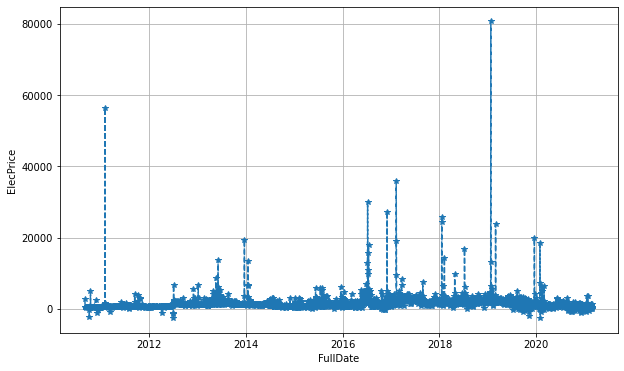

In [13]:
# Visuals of the relationship between timestamp and the target after downsampling
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_day.index, df_day.ElecPrice, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'FullDate' )
plt.ylabel( 'ElecPrice' )

In [14]:
df_MA = df_day.copy()
MA = df_MA['ElecPrice'].rolling(12).mean()

Text(0, 0.5, 'ElecPrice')

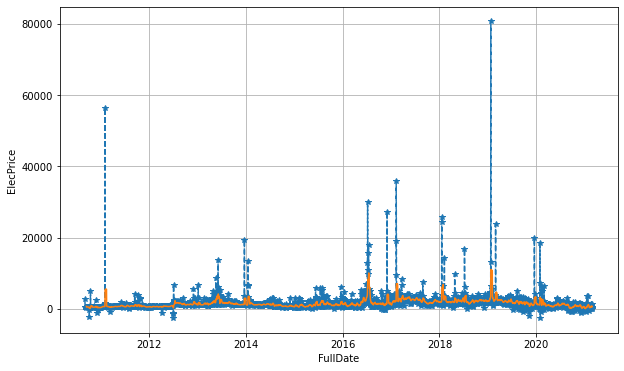

In [15]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_MA.index, df_MA.ElecPrice, '--' , marker= '*' , )
plt.plot(MA.index, MA, '-')
plt.grid()
plt.xlabel( 'FullDate' )
plt.ylabel( 'ElecPrice' ) 

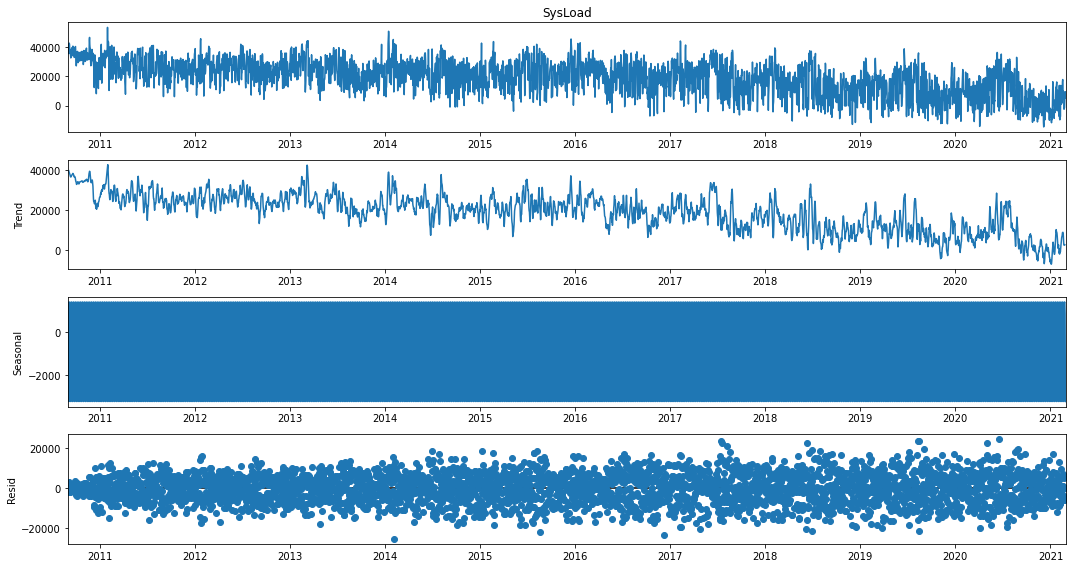

In [16]:
# seasonal Decomposition for stationality check
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df_day['SysLoad'], model='additive')
decompose_series.plot()
plt.show()

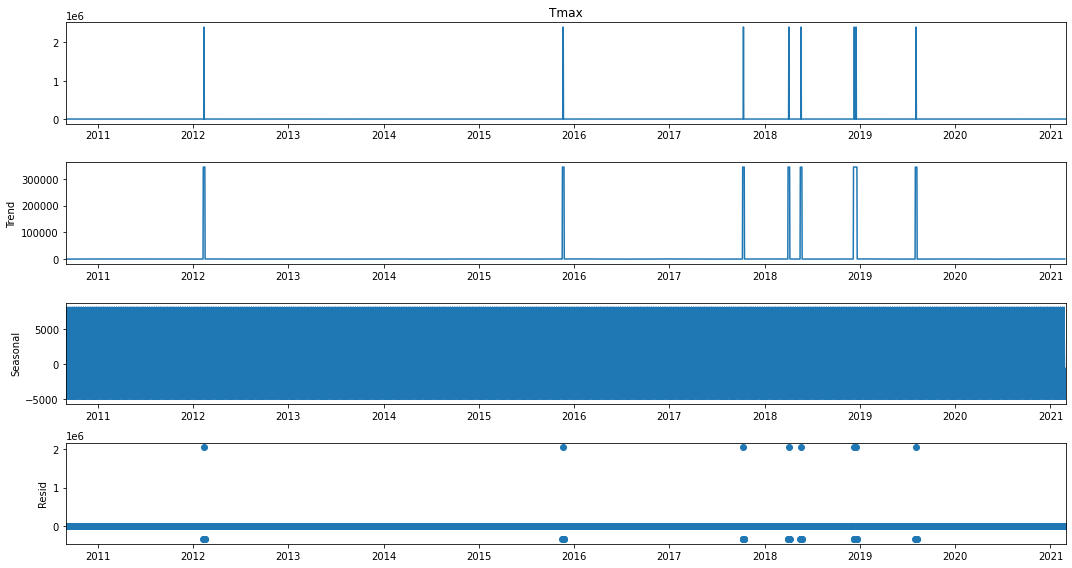

In [17]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df_day['Tmax'], model='additive')
decompose_series.plot()
plt.show()

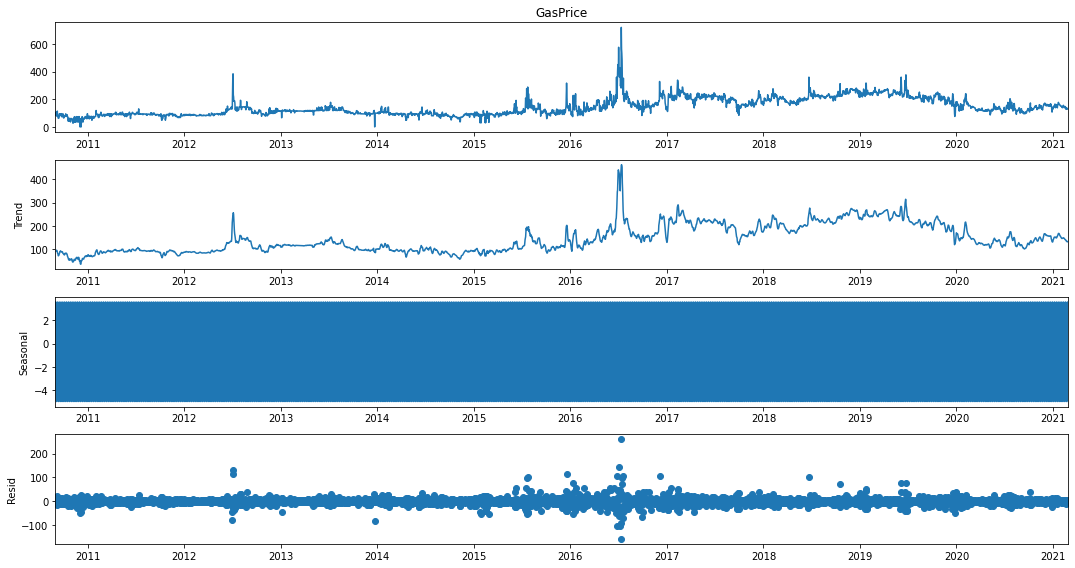

In [18]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df_day['GasPrice'], model='additive')
decompose_series.plot()
plt.show()

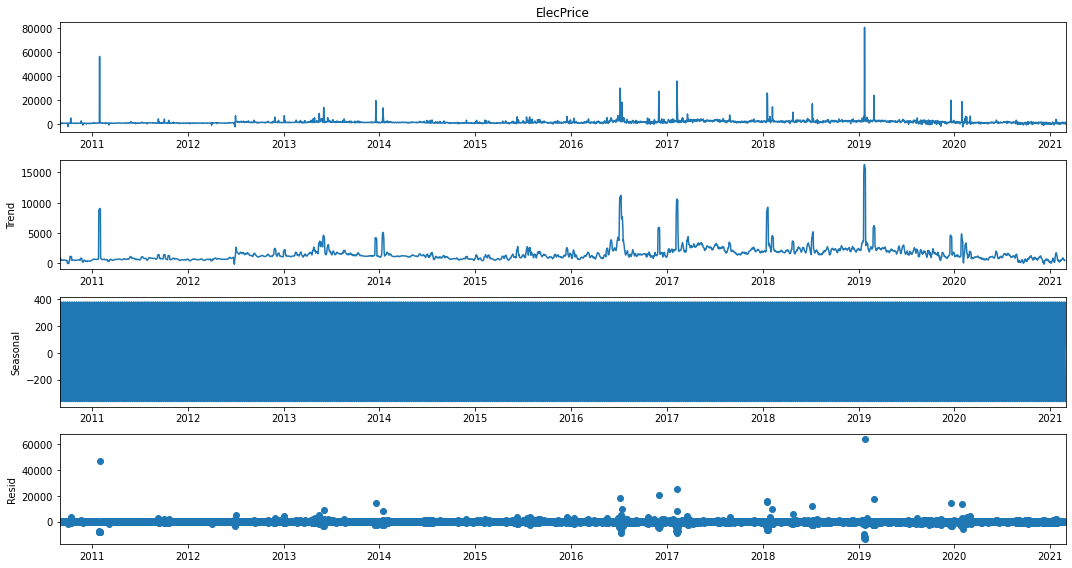

In [19]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df_day['ElecPrice'], model='additive')
decompose_series.plot()
plt.show()

In [20]:
# Test for stationarity using ADF method
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_day['SysLoad'])
print(f'ADF Statistics: {adf_result[0]}')
print(f'p-value for SysLoad to 6 decimal places: {round(adf_result[1], 6)}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}') 


ADF Statistics: -3.6901589888366457
p-value for SysLoad to 6 decimal places: 0.004254
No. of lags used: 30
No. of observations used : 3803
Critical Values:
   1%: -3.432070672988693
   5%: -2.8623002987378547
   10%: -2.567174716967499


In [21]:
# The P-value is greater than 5% citical value. This affirms that the data is non-stationary

In [22]:
adf_result = adfuller(df_day['GasPrice'])
print(f'ADF Statistics: {adf_result[0]}')
print(f'p-value for GasPrice to 6 decimal places: {round(adf_result[1], 6)}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}') 

ADF Statistics: -2.90276669716518
p-value for GasPrice to 6 decimal places: 0.045027
No. of lags used: 27
No. of observations used : 3806
Critical Values:
   1%: -3.4320693157877544
   5%: -2.8622996992165364
   10%: -2.5671743978048323


In [23]:
# The P-value is greater than 5% citical value. This affirms that the data is non-stationary

In [24]:
adf_result = adfuller(df_day['Tmax'])
print(f'ADF Statistics: {adf_result[0]}')
print(f'p-value for GasPrice to 6 decimal places: {round(adf_result[1], 6)}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}') 

ADF Statistics: -20.766001357159357
p-value for GasPrice to 6 decimal places: 0.0
No. of lags used: 6
No. of observations used : 3827
Critical Values:
   1%: -3.4320598750004825
   5%: -2.862295528895607
   10%: -2.567172177683642


In [25]:
# The P-value is greater than 5% citical value. This affirms that the data is non-stationary

In [26]:
adf_result = adfuller(df_day['ElecPrice'])
print(f'ADF Statistics: {adf_result[0]}')
print(f'p-value for ElecPrice to 6 decimal places: {round(adf_result[1], 6)}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}') 

ADF Statistics: -8.269053866873803
p-value for ElecPrice to 6 decimal places: 0.0
No. of lags used: 20
No. of observations used : 3813
Critical Values:
   1%: -3.432066157296446
   5%: -2.8622983040036005
   10%: -2.5671736550459663


In [27]:
# The P-value is greater than 5% citical value. This affirms that the data is non-stationary

In [28]:
# To make the time series data stationary, trend and seasonality have to be removed via transformation and differnecing

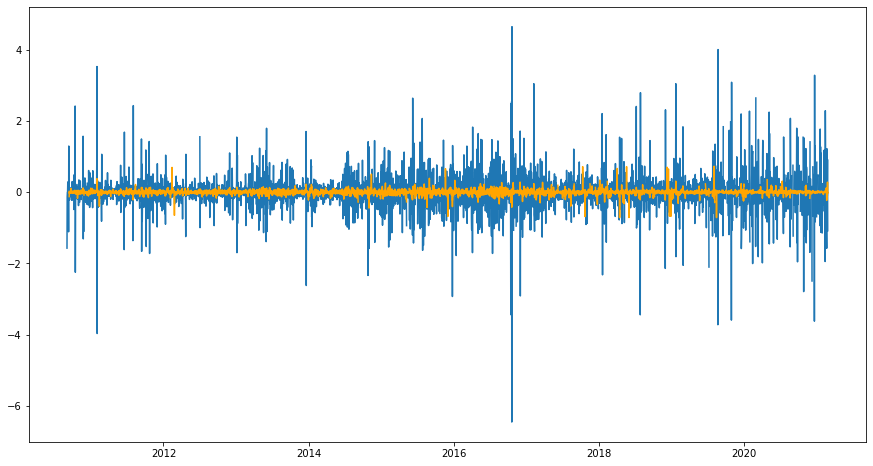

In [29]:
df_day_log = np.log(df_day)
df_day_diff = df_day_log.diff(periods= 1 )
plt.plot(df_day_diff.index, df_day_diff.ElecPrice, '-' )
plt.plot(df_day_diff.rolling( 12 ).mean(), color= 'orange' )
plt.show()

In [30]:
df_day_diff.dropna(inplace=True)

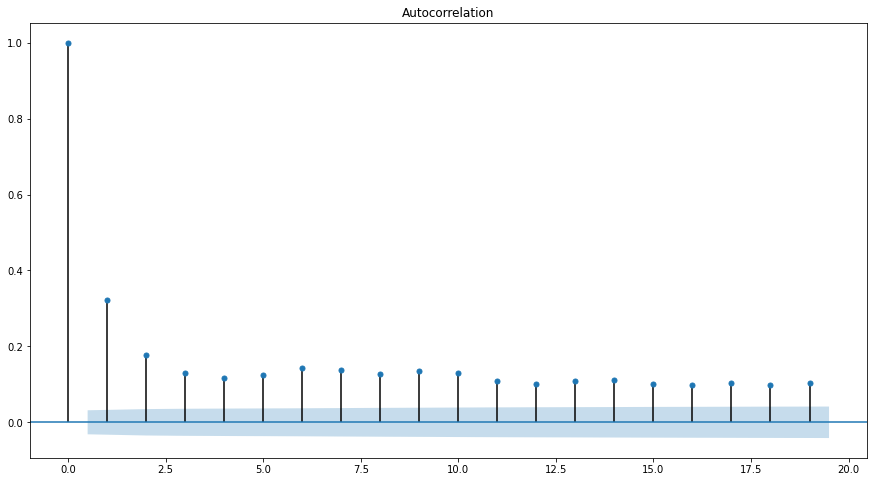

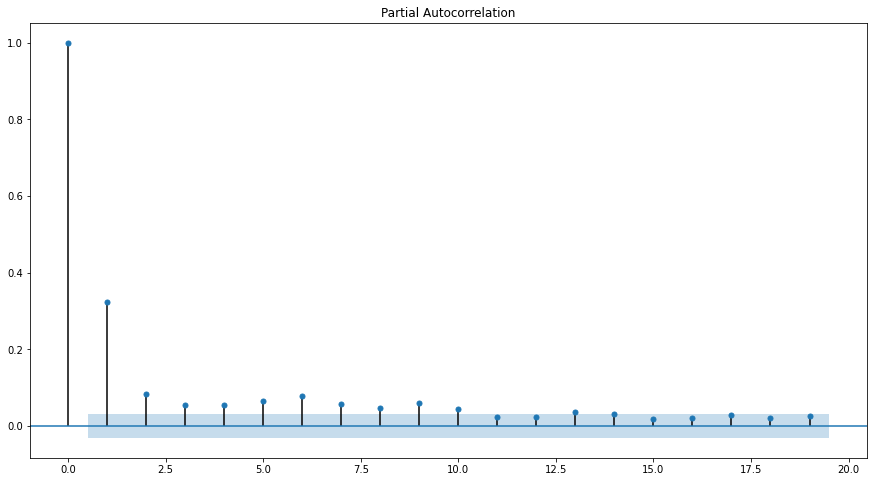

In [31]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#for acf
plot_acf(df_day1, lags = range( 0 , 20 ))
plt.show()
#for pacf
plot_pacf(df_day1, lags = range( 0 , 20 ))
plt.show() 

In [32]:
# ! pip install pmdarima


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 63.3 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [33]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df_day1['ElecPrice'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=69623.956, Time=2.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=71355.706, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=70710.367, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=69786.355, Time=1.75 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=71353.706, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=69605.756, Time=6.51 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=69621.957, Time=6.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=69605.421, Time=6.74 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=69605.728, Time=8.80 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=70431.763, Time=0.48 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=69603.421, Time=3.89 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=69784.355, Time=1.61 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=70708.367, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=69603.727, Time=4.81 sec
 ARIMA(1,1,2)(0,0,0

In [34]:
# splitting dataset to train and test sets
print(df_day1.shape)
train_set=df_day1[:2757]
test_set=df_day1[2757:]
print(train_set.shape,test_set.shape)

(3834, 1)
(2757, 1) (1077, 1)


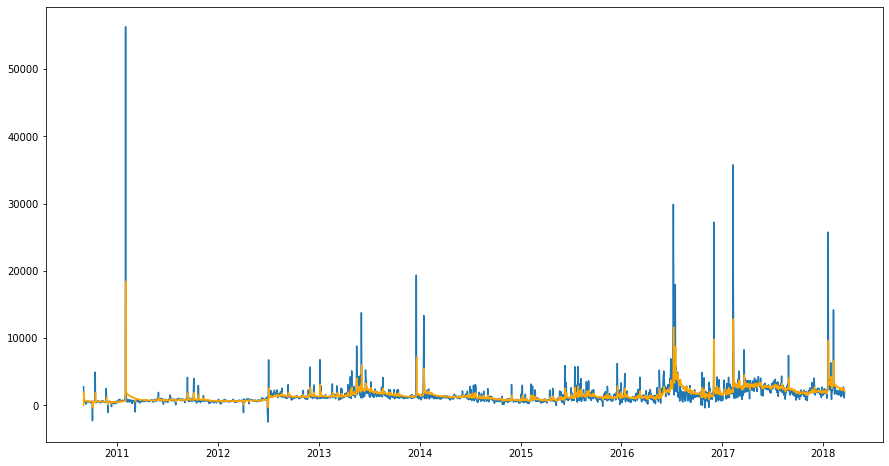

In [35]:
from statsmodels.tsa.arima.model import ARIMA
AR_model = ARIMA(train_set['ElecPrice'], order=( 1, 1, 1 ))
output = AR_model.fit()
plt.plot(train_set)
plt.plot(output.fittedvalues, color= 'orange' )
plt.show()

In [36]:
start=len(train_set)
end=len(df_day1)-1
predicts=output.predict(start=start,end=end, exog=None, dynamic=False).rename('ARIMA Predictions')
# print(predicts)
#pred.index = data.index[start:end+1]
predicts.head()

2018-03-20    2292.966322
2018-03-21    2378.731726
2018-03-22    2403.694977
2018-03-23    2410.960889
2018-03-24    2413.075737
Freq: D, Name: ARIMA Predictions, dtype: float64

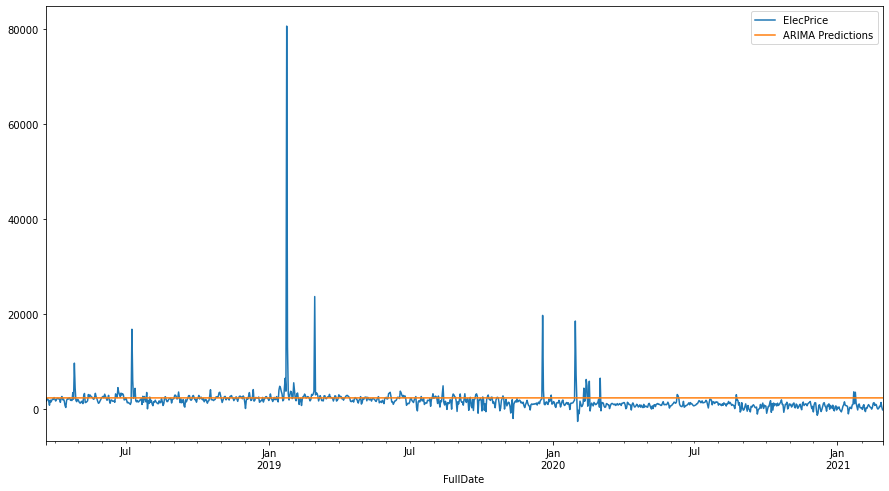

In [37]:
test_set['ElecPrice'].plot(legend=True)
predicts.plot(legend=True)
plt.show()

In [38]:
# calculating RMSE 
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
test_set['ElecPrice'].mean()
rmse=sqrt(mean_squared_error(predicts,test_set['ElecPrice']))
rmse

2942.4733215530377

In [39]:
df_day_diff.ElecPrice.mean()

-0.00203823425303006

In [40]:
mae = mean_absolute_error(test_set['ElecPrice'], predicts)
mae

1190.5924413134405

In [41]:
mape = mean_absolute_percentage_error(test_set['ElecPrice'], predicts)
mape

3.9112177384279176

### Univariate and Multivariate Tasks with  Facebook Prophet

In [42]:
# Univariate Task with  Facebook Prophet
# creating dataframe compatible with prophet
df_day_copy = df_day.copy().reset_index()
df_day_copy = df_day_copy[['FullDate', 'ElecPrice']].rename(columns={'FullDate':'ds', 'ElecPrice':'y'})
df_day_copy.head()


,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [43]:
# Splitting Dataset into Train and Test Sets
xu = df_day_copy
yu = df_day_copy['y']
x1_train, x1_test = xu[:2757], xu[2757:]
y1_train, y1_test = yu[:2757], yu[2757:]

In [44]:
# Confirming lengths of the split sets
print(f'Length of x1_train: {len(x1_train)}')
print(f'Length of x1_test: {len(x1_test)}')
print(f'Length of y1_train: {len(y1_train)}')
print(f'Length of y1_test: {len(y1_test)}')


Length of x1_train: 2757
Length of x1_test: 1077
Length of y1_train: 2757
Length of y1_test: 1077


In [45]:
# Creating object of the model and training the model
from prophet import Prophet
m = Prophet()
m.fit(x1_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp54oiqkjv/nxjpa9hr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp54oiqkjv/y248xwk7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35337', 'data', 'file=/tmp/tmp54oiqkjv/nxjpa9hr.json', 'init=/tmp/tmp54oiqkjv/y248xwk7.json', 'output', 'file=/tmp/tmp54oiqkjv/prophet_modelwjadm42x/prophet_model-20230129155106.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:51:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:51:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [46]:
# Forecasting with the earlier trained model
future = m.make_future_dataframe(periods = len(x1_test), freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,848.802868,-1324.431232,3231.465983,848.802868,848.802868,143.934254,143.934254,143.934254,159.353195,159.353195,159.353195,-15.418942,-15.418942,-15.418942,0.0,0.0,0.0,992.737122
1,2010-09-02,848.765391,-1410.780607,3544.619514,848.765391,848.765391,224.225577,224.225577,224.225577,257.107547,257.107547,257.107547,-32.881970,-32.881970,-32.881970,0.0,0.0,0.0,1072.990968
2,2010-09-03,848.727914,-1537.530207,3357.330552,848.727914,848.727914,-0.808614,-0.808614,-0.808614,50.273097,50.273097,50.273097,-51.081712,-51.081712,-51.081712,0.0,0.0,0.0,847.919300
3,2010-09-04,848.690437,-2110.280458,2925.736630,848.690437,848.690437,-341.125956,-341.125956,-341.125956,-271.443120,-271.443120,-271.443120,-69.682836,-69.682836,-69.682836,0.0,0.0,0.0,507.564481
4,2010-09-05,848.652960,-2011.491333,2662.343664,848.652960,848.652960,-431.103276,-431.103276,-431.103276,-342.724784,-342.724784,-342.724784,-88.378492,-88.378492,-88.378492,0.0,0.0,0.0,417.549684


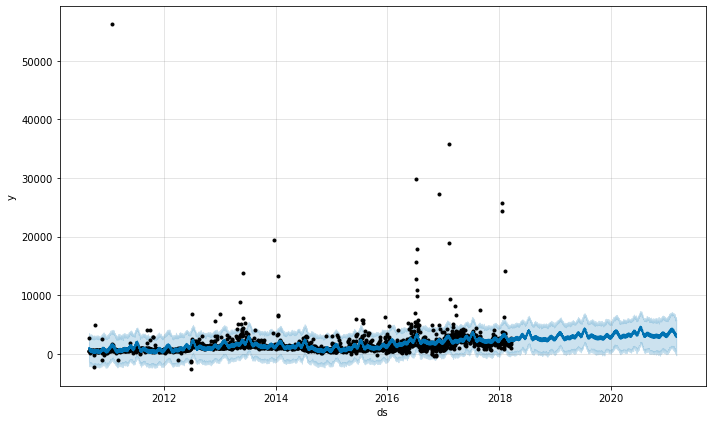

In [47]:
# Visuals of forecast without regressors
m.plot(forecast);

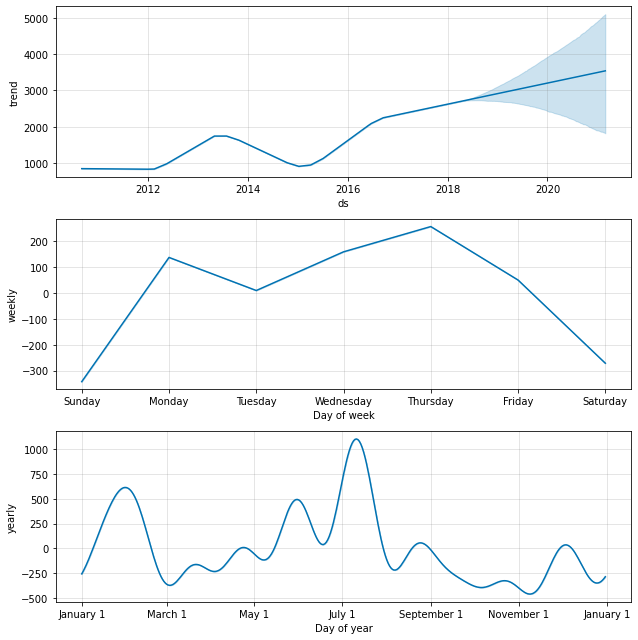

In [48]:
m.plot_components(forecast);

In [49]:
# Model Perfromance Checks with necessary metrics
import sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [50]:
def mape(actual, prediction):
  actual, prediction = np.array(actual), np.array(prediction)
  return np.mean(np.abs((actual - prediction)/actual))*100

In [51]:
actual = y1_test
prediction = forecast['yhat'][:1077]

In [52]:
# len(forecast['yhat'])

In [53]:
mape(actual, prediction)

296.8520978909277

In [54]:
mse = mean_squared_error(actual, prediction)
rmse = round(np.sqrt(mse), 2)
rmse

3054.04

In [55]:
mae = mean_absolute_error(actual, prediction)
mae

1332.8837430299695

In [56]:
# Multivariate Task Part
# creating dataframe compatible with prophet 
df_mul = df_day.copy().reset_index()
df_mul = df_mul.rename(columns={'FullDate':'ds', 'Tmax':'add2', 'SysLoad':'add1', 'GasPrice':'add3', 'ElecPrice':'y'})
df_mul.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [57]:
# Splitting Dataset into train and test sets
xm = df_mul
ym = df_mul['y']
x2_train, x2_test = xm[:2757], xm[2757:]
y2_train, y2_test = ym[:2757], ym[2757:]

In [58]:
# checking lengths of split sets
print(f'Length of x2_train: {len(x2_train)}')
print(f'Length of x2_test: {len(x2_test)}')
print(f'Length of y2_train: {len(y2_train)}')
print(f'Length of y2_test: {len(y2_test)}')

Length of x2_train: 2757
Length of x2_test: 1077
Length of y2_train: 2757
Length of y2_test: 1077


In [59]:
# Make an object of the model and add regressors
mm = Prophet()
mm.add_regressor('add1')
mm.add_regressor('add2')
mm.add_regressor('add3')
mm.fit(x2_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp54oiqkjv/1t83ysgg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp54oiqkjv/32umd2z_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59169', 'data', 'file=/tmp/tmp54oiqkjv/1t83ysgg.json', 'init=/tmp/tmp54oiqkjv/32umd2z_.json', 'output', 'file=/tmp/tmp54oiqkjv/prophet_modelfpa5h_52/prophet_model-20230129155112.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:51:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:51:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [60]:
# Inclusion of regressors and Forcasting  
future_mul = mm.make_future_dataframe(periods=len(x2_test), freq='D')
# future_mul = pd.merge(future, Xm_test[['ds', 'add1', 'add2', 'add3']], on='ds', how='inner')
future_mul['add1'] = x2_train['add1']
future_mul['add2'] = x2_train['add2']
future_mul['add3'] = x2_train['add3']
forward_future_mul = future_mul.fillna(method='ffill')
# forward_future_mul
forecast_mul = mm.predict(forward_future_mul)
forecast_mul.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,985.384779,-693.147983,3645.356435,985.384779,985.384779,1038.331972,1038.331972,1038.331972,0.250726,...,42.524741,42.524741,42.524741,-4.126805,-4.126805,-4.126805,0.0,0.0,0.0,1506.529047
1,2010-09-02,985.937293,-884.231233,3848.887531,985.937293,985.937293,889.172824,889.172824,889.172824,0.251589,...,145.612882,145.612882,145.612882,-7.029620,-7.029620,-7.029620,0.0,0.0,0.0,1458.108601
2,2010-09-03,986.489807,-531.896811,3837.473603,986.489807,986.489807,1043.947278,1043.947278,1043.947278,0.245336,...,-44.306399,-44.306399,-44.306399,-9.992706,-9.992706,-9.992706,0.0,0.0,0.0,1687.621459
3,2010-09-04,987.042321,-1265.385113,2958.191549,987.042321,987.042321,706.756219,706.756219,706.756219,0.255254,...,-117.531858,-117.531858,-117.531858,-12.745915,-12.745915,-12.745915,0.0,0.0,0.0,902.515506
4,2010-09-05,987.594835,-964.882630,3677.708556,987.594835,987.594835,705.264007,705.264007,705.264007,0.252667,...,-69.521370,-69.521370,-69.521370,-15.046333,-15.046333,-15.046333,0.0,0.0,0.0,1319.781950


In [61]:
forward_future_mul.isnull().sum()

ds      0
add1    0
add2    0
add3    0
dtype: int64

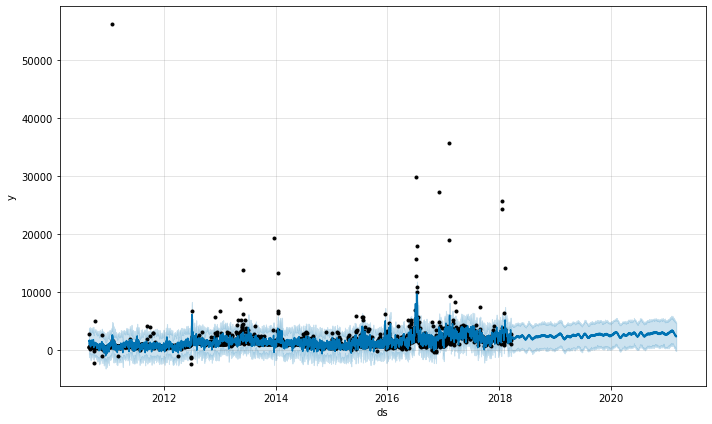

In [62]:
# Visuals of Forecasts with regressors
mm.plot(forecast_mul);

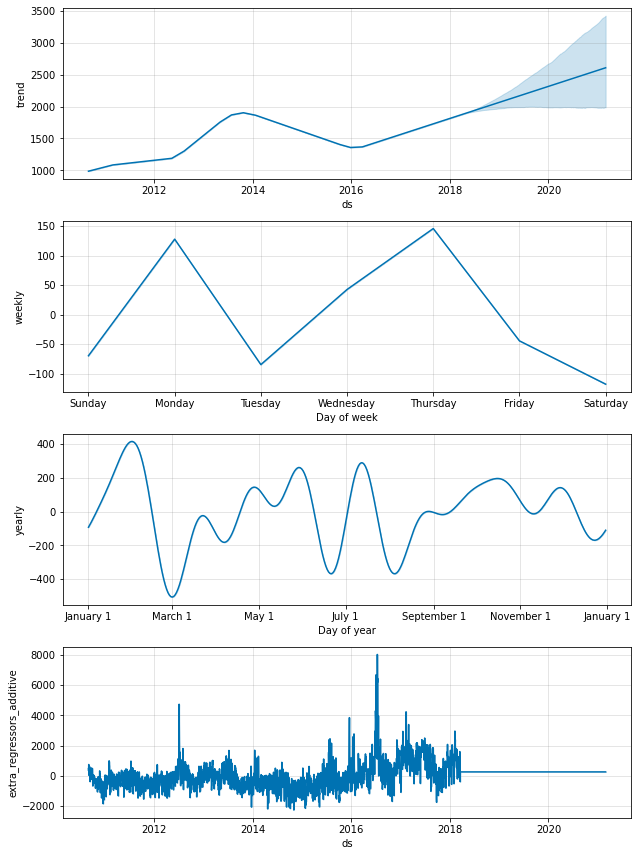

In [63]:
mm.plot_components(forecast_mul);

In [64]:
# Model Performance Evaluation using necessary metrics
def mape_mul(actual_m, prediction_m):
  actual_m, prediction_m = np.array(actual_m), np.array(prediction_m)
  return np.mean(np.abs((actual_m - prediction_m)/actual_m)*100)

In [65]:
actual_m = y2_test
prediction_m = forecast_mul['yhat'][:1077]

In [66]:
mape_mul(actual_m, prediction_m)


297.4312309911153

In [67]:
mse_mul = mean_squared_error(actual_m, prediction_m)
rmse_mul = round(np.sqrt(mse_mul), 2)
rmse_mul

3112.64

In [68]:
mae_mul = mean_absolute_error(actual_m, prediction_m)
mae_mul

1399.9918432037289

In [83]:
# creating dataframe (without Tmax) compatible with prophet 
df_mull = df_day.copy().reset_index()
df_mull = df_mull.rename(columns={'FullDate':'ds', 'SysLoad':'add1', 'GasPrice':'add3', 'ElecPrice':'y'}).drop('Tmax', axis=1)
df_mull.head()

,ds,add1,add3,y
0,2010-09-01,41565.380,88.56,2751.700
1,2010-09-02,38898.990,88.56,570.810
2,2010-09-03,41665.760,106.80,504.975
3,2010-09-04,35638.085,81.36,502.275
4,2010-09-05,35611.410,106.80,500.555


In [74]:
# Splitting Dataset into train and test sets
xmt = df_mull
ymt = df_mull['y']
x2t_train, x2t_test = xmt[:2757], xmt[2757:]
y2t_train, y2t_test = ymt[:2757], ymt[2757:]

In [75]:
# checking lengths of split sets
print(f'Length of x2t_train: {len(x2t_train)}')
print(f'Length of x2t_test: {len(x2t_test)}')
print(f'Length of y2t_train: {len(y2t_train)}')
print(f'Length of y2t_test: {len(y2t_test)}')

Length of x2t_train: 2757
Length of x2t_test: 1077
Length of y2t_train: 2757
Length of y2t_test: 1077


In [76]:
# Make an object of the model and add regressors
mmt = Prophet()
mmt.add_regressor('add1')

mmt.add_regressor('add3')
mmt.fit(x2t_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp54oiqkjv/5_97ctid.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp54oiqkjv/cox05khc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16086', 'data', 'file=/tmp/tmp54oiqkjv/5_97ctid.json', 'init=/tmp/tmp54oiqkjv/cox05khc.json', 'output', 'file=/tmp/tmp54oiqkjv/prophet_modeljpszw4ct/prophet_model-20230129164152.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:41:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:41:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [78]:
# Inclusion of regressors and Forcasting  
future_mull = mmt.make_future_dataframe(periods=len(x2t_test), freq='D')
# future_mull = pd.merge(future_mull, Xm_test[['ds', 'add1', 'add2', 'add3']], on='ds', how='inner')
future_mull['add1'] = x2t_train['add1']

future_mull['add3'] = x2t_train['add3']
forward_future_mull = future_mull.fillna(method='ffill')
# forward_future_mull
forecast_mull = mmt.predict(forward_future_mull)
forecast_mull.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add3,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,988.983931,-837.972506,3812.480484,988.983931,988.983931,1038.673237,1038.673237,1038.673237,-555.025881,...,42.809290,42.809290,42.809290,-4.259897,-4.259897,-4.259897,0.0,0.0,0.0,1511.180681
1,2010-09-02,989.537007,-712.825268,3709.291759,989.537007,989.537007,889.465066,889.465066,889.465066,-555.025881,...,145.306554,145.306554,145.306554,-7.207109,-7.207109,-7.207109,0.0,0.0,0.0,1462.075638
2,2010-09-03,990.090083,-478.824318,3857.838820,990.090083,990.090083,1044.290389,1044.290389,1044.290389,-288.340801,...,-44.084753,-44.084753,-44.084753,-10.205580,-10.205580,-10.205580,0.0,0.0,0.0,1691.749338
3,2010-09-04,990.643159,-1397.744371,3131.152893,990.643159,990.643159,706.988507,706.988507,706.988507,-660.296307,...,-117.872153,-117.872153,-117.872153,-12.984725,-12.984725,-12.984725,0.0,0.0,0.0,906.478481
4,2010-09-05,991.196235,-846.737900,3716.455922,991.196235,991.196235,705.495804,705.495804,705.495804,-288.340801,...,-69.301455,-69.301455,-69.301455,-15.301494,-15.301494,-15.301494,0.0,0.0,0.0,1323.748290


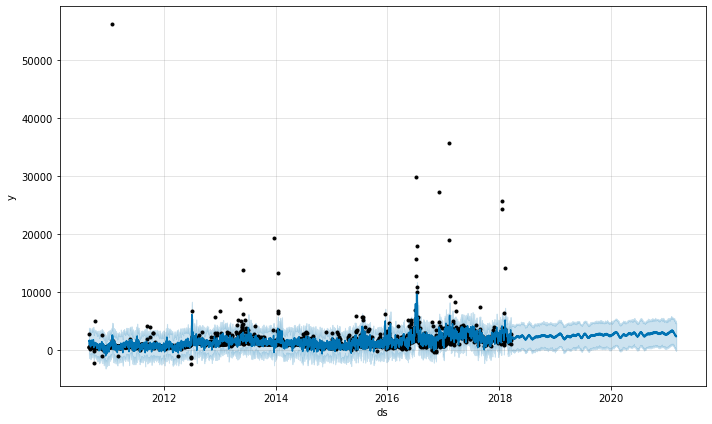

In [85]:
mmt.plot(forecast_mull);

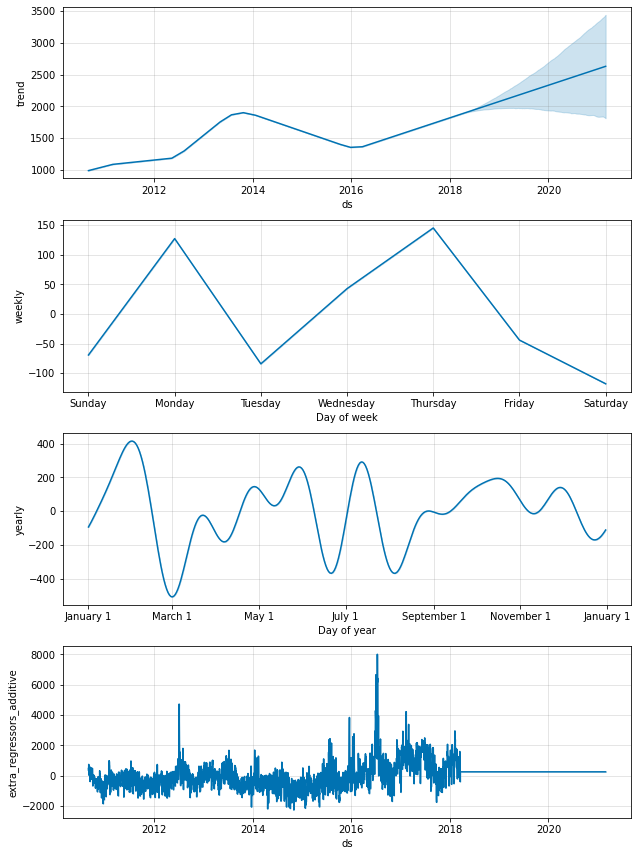

In [88]:
mmt.plot_components(forecast_mull);

In [79]:
# Model Performance Evaluation using necessary metrics
def mape_mull(actual_mt, prediction_mt):
  actual_mt, prediction_mt = np.array(actual_mt), np.array(prediction_mt)
  return np.mean(np.abs((actual_mt - prediction_mt)/actual_mt)*100)

In [80]:
actual_mt = y2t_test
prediction_mt = forecast_mull['yhat'][:1077]

In [82]:
mape_mull(actual_mt, prediction_mt)

297.2234407524858

In [81]:
mae_mull = mean_absolute_error(actual_mt, prediction_mt)
mae_mull

1398.4224886652212